In [10]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable
%matplotlib inline

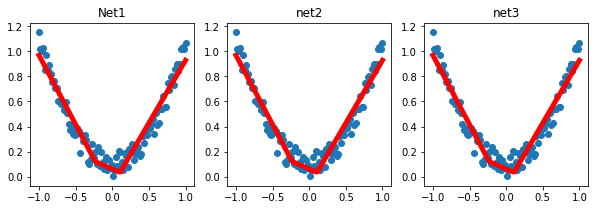

In [20]:
torch.manual_seed(1)
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(2)+0.2*torch.rand(x.size())
x,y = Variable(x,requires_grad = False),Variable(y,requires_grad=False)

def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    optimizer = torch.optim.SGD(net1.parameters(),lr=0.05)
    loss_func = torch.nn.MSELoss()
    
    for t in range(1000):
        prediction = net1(x)
        loss = loss_func(prediction,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    torch.save(net1,'net.pkl')                     # entire net
    torch.save(net1.state_dict(),'net_params.pkl') # parameters
    
    # 画图
    plt.figure(1,figsize=(10,3))
    plt.subplot(131)
    plt.title("Net1")
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
    
def restore_net():
    net2 = torch.load('net.pkl')
    prediction = net2(x)
    plt.subplot(132)
    plt.title("net2")
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
    
    
    
    
    
def restore_params():
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    plt.subplot(133)
    plt.title("net3")
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
    plt.show()
    
    
save()
restore_net()
restore_params()